In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from paretoset import paretoset

import model_functions as fmodel

# Matrix ISA Model Example Usage

### Number of Registers to Hide Memory Latency

using larger memories with higher latency requires more matrix registers to acheive high utilization. below is a plot showing how utilization is affected by memory latency for different matrix register counts.

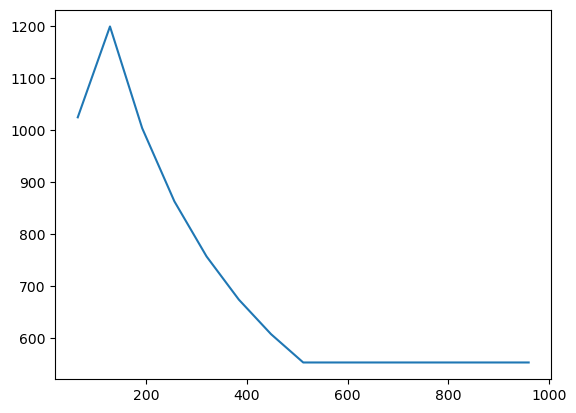

In [3]:
K = np.array(range(64, 1024, 64))
vec_speedup = np.zeros(len(K))
for i in range(len(K)):
    perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                                num_mregs=np.array([8]),
                                M=np.array([K[i]]),
                                N=np.array([K[i]]),
                                K=np.array([K[i]]))  # Corrected from k to K[i]
    vec_speedup[i] = perf_model['speedup_vec']
plt.plot(K, vec_speedup)

KeyError: 'vec_area '

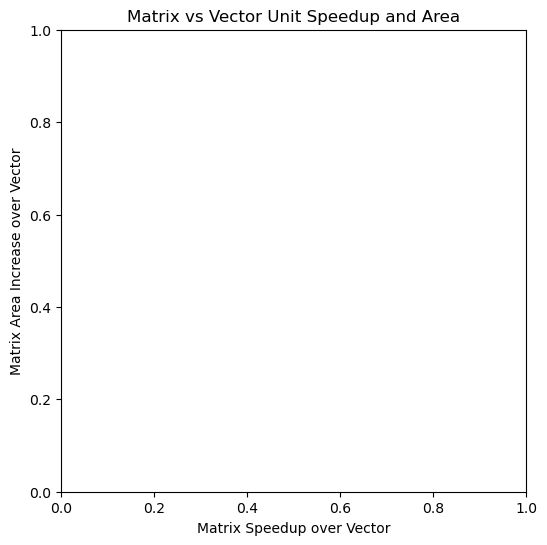

In [7]:
fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Matrix vs Vector Unit Speedup and Area')
axs.set_xlabel('Matrix Speedup over Vector')
axs.set_ylabel('Matrix Area Increase over Vector')

perf_model = fmodel.init_pm(
    # mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([0, 2]),
    width_datapath = np.array([0.5, 1])
)

vec_speedup = perf_model['speedup_vec']
vec_area = perf_model['vec_area ']

scatter = axs.scatter(vec_speedup, vec_area)
perf_model

t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu          
8        20    4  12 4  128      1  16.0 16.0 2         0    4     0.5        184.0   
                                                                   1.0         76.0   
                                                        2    4     0.5        104.0   
                                                                   1.0         56.0   
                                              4         0    4     0.5        184.0   
...                                                                             ...   
               60 60 60 128      1  64.0 32.0 2         2    4     0.5        280.0   
                                              4         0    4     0.5        536.0   
                                                        2    4     0.5        280.0   
                                         64.0 2         0    4     0.5        792.0   
                                              4         0    4     0.5        792.0   

                                                                                  util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    4  12 4  128      1  16.0 16.0 2         0    4     0.5        0.187500   
                                                                   1.0        0.177632   
                                                        2    4     0.5        0.187500   
                                                                   1.0        0.107143   
                                              4         0    4     0.5        0.187500   
...                                                                                ...   
               60 60 60 128      1  64.0 32.0 2         2    4     0.5        0.878906   
                                              4         0    4     0.5        0.878906   
                                                        2    4     0.5        0.878906   
                                         64.0 2         0    4     0.5        0.878906   
                                              4         0    4     0.5        0.878906   

                                                                                ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                
8        20    4  12 4  128      1  16.0 16.0 2         0    4     0.5          48.000000   
                                                                   1.0          45.473684   
                                                        2    4     0.5          48.000000   
                                                                   1.0          27.428571   
                                              4         0    4     0.5          48.000000   
...                                                                                   ...   
               60 60 60 128      1  64.0 32.0 2         2    4     0.5        1800.000000   
                                              4         0    4     0.5        1800.000000   
                                                        2    4     0.5        1800.000000   
                                         64.0 2         0    4     0.5        3600.000000   
                                              4         0    4     0.5        3600.000000   

                                                                              max_mregs  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    4  12 4  128      1  16.0 16.0 2         0    4     0.5              2.0   
                                                                   1.0              3.0   
                                                        2    4     0.5              2.0   
                                                                   1.0              4.0   
                    

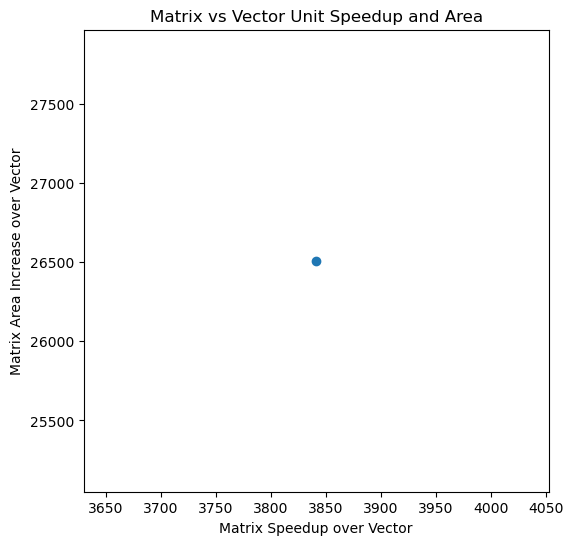

In [7]:

# perf_model = perf_model[perf_model['blas_mem_bw'] <= 64]
# perf_model = perf_model[perf_model['ops_cycle'] >= 1/4e-2]

pm_pareto = perf_model[['speedup_vec','vec_area']]
mask = paretoset(pm_pareto, sense=['max', 'min'])

speedup_vec = perf_model.loc[mask, 'speedup_vec']
vec_area = perf_model.loc[mask, 'vec_area']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Matrix vs Vector Unit Speedup and Area')
axs.set_xlabel('Matrix Speedup over Vector')
axs.set_ylabel('Matrix Area Increase over Vector')

scatter = axs.scatter(speedup_vec, vec_area)
perf_model

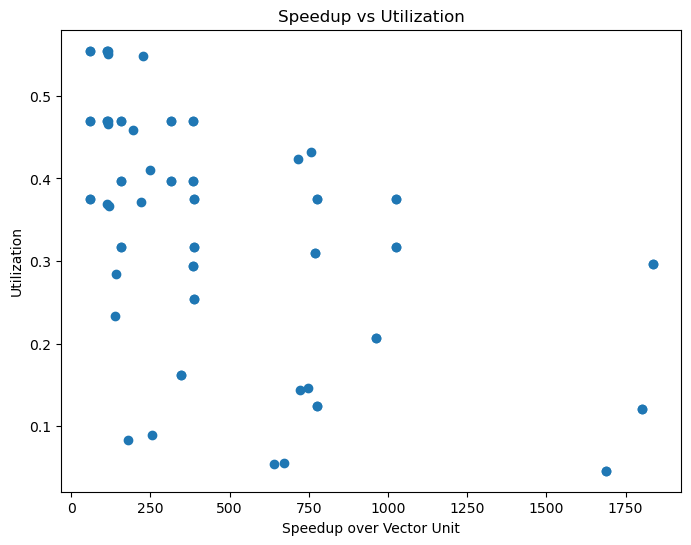

,vlB,mlB,num_mregs,t_op,width_mmu,util,speedup_vec
0,16.0,16.0,2,0,0.5,0.554674,57.903738
1,16.0,16.0,2,0,1.0,0.551025,115.754458
2,16.0,16.0,2,2,0.5,0.554674,112.148558
3,16.0,16.0,2,2,1.0,0.459184,193.678100
4,16.0,16.0,4,0,0.5,0.554674,57.903738
...,...,...,...,...,...,...,...
67,64.0,64.0,2,2,1.0,0.046113,1686.853659
68,64.0,64.0,4,0,0.5,0.253906,387.686266
69,64.0,64.0,4,0,1.0,0.124370,775.575220
70,64.0,64.0,4,2,0.5,0.207198,960.706057


In [8]:
# Group by M, N, K and find the maximum speedup_vec for each group
avg_nmk = perf_model.groupby(['vlB', 'mlB', 'num_mregs', 't_op', 'width_mmu'])['util'].mean().reset_index()
avg_speedup = perf_model.groupby(['vlB', 'mlB', 'num_mregs', 't_op', 'width_mmu'])['speedup_vec'].mean().reset_index()
avg_nmk['speedup_vec'] = avg_speedup['speedup_vec']

pm_pareto = avg_nmk[['speedup_vec','util']]
mask = paretoset(pm_pareto, sense=['max', 'max'])

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Speedup vs Utilization')
axs.set_xlabel('Speedup over Vector Unit')
axs.set_ylabel('Utilization')

scatter = axs.scatter(avg_nmk['speedup_vec'], avg_nmk['util'])
plt.show()
# Write the output to a file
with open('avg_nmk.txt', 'w') as f:
    sorted = avg_nmk.sort_values(by='speedup_vec', ascending=False)
    f.write(sorted.to_string())
avg_nmk

/var/folders/hc/58trqhn5091504q0fyxy68jc0000gn/T/ipykernel_61046/610245788.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x_labels, rotation=90)


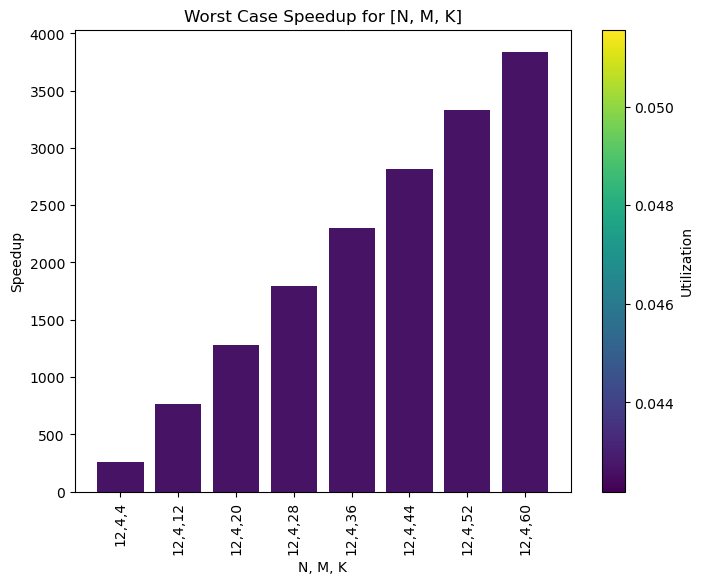

t_uk      util  ops_cycle  max_mregs  \
M N  K  vlB  mlB  widen                                          
4 12 4  16.0 64.0 4      104.0  0.046875       48.0        2.0   
     12 16.0 64.0 4      104.0  0.046875       48.0        2.0   
     20 16.0 64.0 4      104.0  0.046875       48.0        2.0   
     28 16.0 64.0 4      104.0  0.046875       48.0        2.0   
     36 16.0 64.0 4      104.0  0.046875       48.0        2.0   
     44 16.0 64.0 4      104.0  0.046875       48.0        2.0   
     52 16.0 64.0 4      104.0  0.046875       48.0        2.0   
     60 16.0 64.0 4      104.0  0.046875       48.0        2.0   

                         max_mrf_capacity  blas_mem_bw  nmk_mem_bw  mrf_bw  \
M N  K  vlB  mlB  widen                                                      
4 12 4  16.0 64.0 4                   0.5          5.0        1.25     9.0   
     12 16.0 64.0 4                   0.5          7.0        3.75    19.0   
     20 16.0 64.0 4                   0.5          9.0        6.25    29.0   
     28 16.0 64.0 4                   0.5         11.0        8.75    39.0   
     36 16.0 64.0 4                   0.5         13.0       11.25    49.0   
     44 16.0 64.0 4                   0.5         15.0       13.75    59.0   
     52 16.0 64.0 4                   0.5         17.0       16.25    69.0   
     60 16.0 64.0 4                   0.5         19.0       18.75    79.0   

                         blas_mem_opi  nmk_mem_opi  mrf_capacity   l3_blas  \
M N  K  vlB  mlB  widen                                                      
4 12 4  16.0 64.0 4          0.600000          2.4           8.0  0.000046   
     12 16.0 64.0 4          1.285714          2.4           8.0  0.000137   
     20 16.0 64.0 4          1.666667          2.4           8.0  0.000229   
     28 16.0 64.0 4          1.909091          2.4           8.0  0.000320   
     36 16.0 64.0 4          2.076923          2.4           8.0  0.000412   
     44 16.0 64.0 4          2.200000          2.4           8.0  0.000504   
     52 16.0 64.0 4          2.294118          2.4           8.0  0.000595   
     60 16.0 64.0 4          2.368421          2.4           8.0  0.000687   

                           l3_nmk  speedup_vec      vec_area  macc_area  \
M N  K  vlB  mlB  widen                                                   
4 12 4  16.0 64.0 4      0.000046        257.0  26508.166667   224000.0   
     12 16.0 64.0 4      0.000137        769.0  26508.166667   224000.0   
     20 16.0 64.0 4      0.000229       1281.0  26508.166667   224000.0   
     28 16.0 64.0 4      0.000320       1793.0  26508.166667   224000.0   
     36 16.0 64.0 4      0.000412       2305.0  26508.166667   224000.0   
     44 16.0 64.0 4      0.000504       2817.0  26508.166667   224000.0   
     52 16.0 64.0 4      0.000595       3329.0  26508.166667   224000.0   
     60 16.0 64.0 4      0.000687       3841.0  26508.166667   224000.0   

                         mrf_area       opu_area  NM_NK_MK  
M N  K  vlB  mlB  widen                                     
4 12 4  16.0 64.0 4      652800.0  899808.166667       112  
     12 16.0 64.0 4      652800.0  899808.166667       240  
     20 16.0 64.0 4      652800.0  899808.166667       368  
     28 16.0 64.0 4      652800.0  899808.166667       496  
     36 16.0 64.0 4      652800.0  899808.166667       624  
     44 16.0 64.0 4      652800.0  899808.166667       752  
     52 16.0 64.0 4      652800.0  899808.166667       880  
     60 16.0 64.0 4      652800.0  899808.166667      1008

In [9]:
# Calculate the new variable (N*M + N*K + M*K)
perf_model['NM_NK_MK'] = perf_model.index.get_level_values('N') * perf_model.index.get_level_values('M') + \
                         perf_model.index.get_level_values('N') * perf_model.index.get_level_values('K') + \
                         perf_model.index.get_level_values('M') * perf_model.index.get_level_values('K')

pm_pareto = perf_model[['NM_NK_MK', 'speedup_vec']]
mask = paretoset(pm_pareto, sense=['min', 'max'])

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Worst Case Speedup for [N, M, K]')
axs.set_xlabel('N, M, K')
axs.set_ylabel('Speedup')

# Create a bar plot with x-axis as the combination of N, M, and K
x_labels = [f'{n},{m},{k}' for n, m, k in zip(perf_model.loc[mask].index.get_level_values('N'), 
                                              perf_model.loc[mask].index.get_level_values('M'), 
                                              perf_model.loc[mask].index.get_level_values('K'))]

speedup = perf_model.loc[mask, 'speedup_vec']
utilization = perf_model.loc[mask, 'util']
scatter = axs.bar(x_labels, speedup, color=plt.cm.viridis(utilization))
axs.set_xticklabels(x_labels, rotation=90)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=utilization.min(), vmax=utilization.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('Utilization')
plt.show()
perf_model.loc[mask].reset_index(level=['databits', 't_mem', 'l2_cache', 'kl', 'num_mregs', 't_op', 'width_mmu'], drop=True)